In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_id = '130KYOX8O4wrP_T8vdz2GfvJRQ03ONmE7'
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"
df = pd.read_csv(download_url)

In [4]:
print(df.shape)
print(df.dtypes)
print(df.memory_usage(deep=True).sum() / 1024**2, 'MB')

(23368, 25)
Unnamed: 0                    int64
ID  объявления                int64
Количество комнат            object
Тип                          object
Метро                        object
Адрес                        object
Площадь, м2                  object
Дом                          object
Парковка                     object
Цена                         object
Телефоны                     object
Описание                     object
Ремонт                       object
Площадь комнат, м2           object
Балкон                       object
Окна                         object
Санузел                      object
Можно с детьми/животными     object
Дополнительно                object
Название ЖК                  object
Серия дома                   object
Высота потолков, м          float64
Лифт                         object
Мусоропровод                 object
Ссылка на объявление         object
dtype: object
70.47252750396729 MB


In [5]:
missing = df.isna().mean().sort_values(ascending=False)
dups = df.duplicated().sum()
const_cols = [c for c in df.columns if df[c].nunique(dropna=False) <= 1]
print('Пропуски, доля:\n', missing.head(10))
print(f'Дубликатов: {dups}.')
print(f'Константные: {const_cols}.')

Пропуски, доля:
 Серия дома                  0.907438
Название ЖК                 0.749743
Парковка                    0.574161
Высота потолков, м          0.520455
Мусоропровод                0.450274
Площадь комнат, м2          0.381291
Балкон                      0.341407
Окна                        0.282994
Можно с детьми/животными    0.260870
Лифт                        0.235365
dtype: float64
Дубликатов: 0.
Константные: ['Тип'].


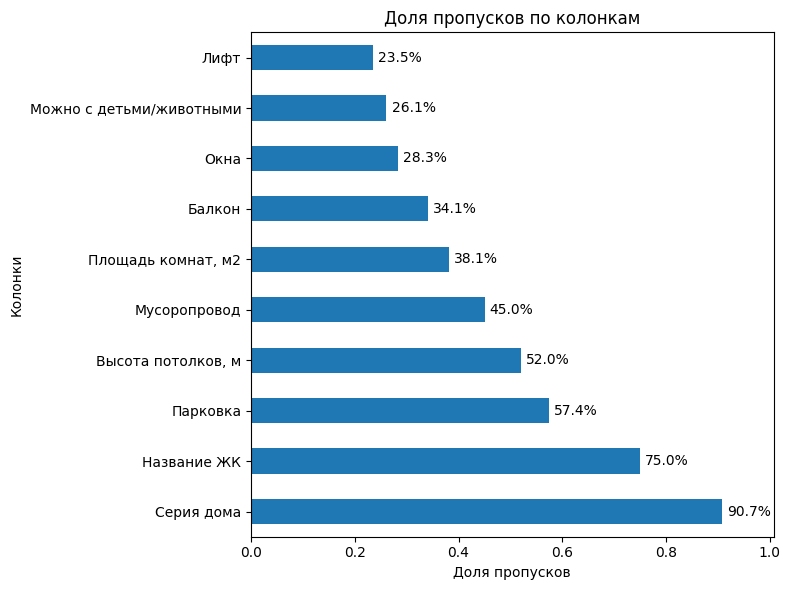

In [10]:
ax = missing.head(10).plot(kind='barh', figsize=(8,6))

plt.title('Доля пропусков по колонкам')
plt.xlabel('Доля пропусков')
plt.ylabel('Колонки')

for p in ax.patches:
    value = p.get_width()
    ax.text(value + 0.01, p.get_y() + p.get_height()/2,
            f'{value*100:.1f}%', va='center')

# делаем место справа для текста
ax.set_xlim(0, missing.head(10).max() + 0.1)

plt.tight_layout()
plt.savefig('./image/4.svg')
plt.show()

In [22]:
def find_cat(data):
    for_dummy = []
    not_for_dummy = []

    for name in data.columns:
        col = data[name]
        if col.dtype == 'object':
            if col.nunique() <= 3:
                for_dummy.append(name)
            else:
                not_for_dummy.append(name)

    return for_dummy, not_for_dummy


for_dummy, not_for_dummy = find_cat(df)

print('Можно просто закодировать: ',for_dummy)
print('\nНельзя так просто закодировать: ', not_for_dummy)

Можно просто закодировать:  ['Тип', 'Окна', 'Можно с детьми/животными', 'Мусоропровод']

Нельзя так просто закодировать:  ['Количество комнат', 'Метро', 'Адрес', 'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны', 'Описание', 'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Санузел', 'Дополнительно', 'Название ЖК', 'Серия дома', 'Лифт', 'Ссылка на объявление']


In [11]:
dups_by_col = '\n'.join([f"{c}: {df[c].duplicated().sum()} повторяется из {df.shape[0]}, уникальных значений: {df[c].nunique()}" for c in df.columns if df[c].duplicated().sum() > 1])
print(dups_by_col)

Количество комнат: 23343 повторяется из 23368, уникальных значений: 24
Тип: 23367 повторяется из 23368, уникальных значений: 1
Метро: 17501 повторяется из 23368, уникальных значений: 5866
Адрес: 10518 повторяется из 23368, уникальных значений: 12850
Площадь, м2: 12113 повторяется из 23368, уникальных значений: 11255
Дом: 20803 повторяется из 23368, уникальных значений: 2565
Парковка: 23362 повторяется из 23368, уникальных значений: 5
Цена: 19446 повторяется из 23368, уникальных значений: 3922
Телефоны: 10196 повторяется из 23368, уникальных значений: 13172
Описание: 290 повторяется из 23368, уникальных значений: 23078
Ремонт: 23363 повторяется из 23368, уникальных значений: 4
Площадь комнат, м2: 19377 повторяется из 23368, уникальных значений: 3990
Балкон: 23349 повторяется из 23368, уникальных значений: 18
Окна: 23364 повторяется из 23368, уникальных значений: 3
Санузел: 23347 повторяется из 23368, уникальных значений: 20
Можно с детьми/животными: 23364 повторяется из 23368, уникальны

In [12]:
#где точно нет дублей
zero_dups = [c for c in df.columns if df[c].duplicated().sum() == 0]
print(zero_dups)

['Unnamed: 0', 'ID  объявления', 'Ссылка на объявление']


In [13]:
#Проверяем гипотезы по городам

#есть квартиры в Москве
msk_mask = df['Адрес'].str.contains('осква', na=False)
msk = df[msk_mask]

#есть квартиры не в Москве
zamkad_mask = ~df['Адрес'].str.contains('осква', na=False)
zamkad = df[zamkad_mask]

print(len(zamkad) + len(mkad) == len(df)) #фильтр работает правильно, есть квартиры в Москве и не в Москве

#квартиры в Спб
spb_mask = zamkad['Адрес'].str.contains('анкт-Петербург', na=False)
spb = zamkad[spb_mask]

#квартиры в Сочи
sochi_mask = zamkad['Адрес'].str.contains('Сочи', na=False)
sochi = zamkad[sochi_mask]

print(len(sochi) + len(spb) == len(zamkad)) #Помимо квартир в Москве, квартиры есть только в Спб и Сочи

NameError: name 'mkad' is not defined

In [15]:
#Делаем df для графика
def get_city(address):
    if 'Москва' in address:
        return 'Москва'
    elif 'Санкт-Петербург' in address:
        return 'Санкт-Петербург'
    elif 'Сочи' in address:
        return 'Сочи'
    else:
        return 'Другое'

df_with_city = df.copy()
df_with_city['City'] = df_with_city['Адрес'].fillna('').apply(get_city)
city_counts = df_with_city['City'].value_counts()
total = city_counts.sum()

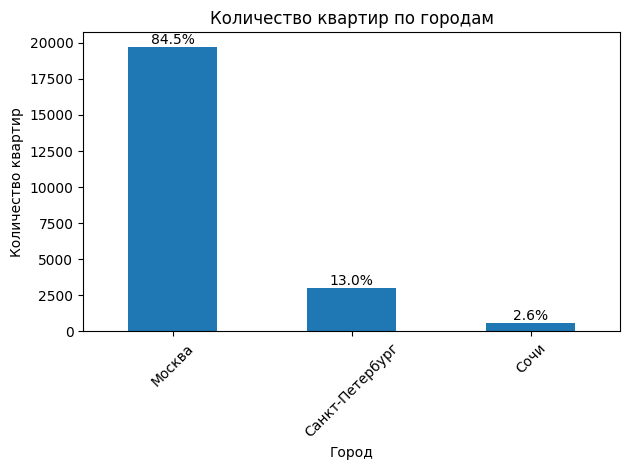

In [17]:
#делаем график из датафрейма
city_counts.plot(kind='bar')
for i, count in enumerate(city_counts.values):
    percent = 100 * count / total
    plt.text(i, count, f"{percent:.1f}%", ha='center', va='bottom')
plt.title('Количество квартир по городам')
plt.xlabel('Город')
plt.xticks(rotation=45)
plt.ylabel('Количество квартир')
plt.tight_layout()
plt.savefig('./image/5.svg')
plt.show()

In [18]:
#Есть цены не в рублях, проверим сколько их

# mask = ~df['Цена'].str.contains(' руб.', na=False)
# df_without_rub = df[mask]

def get_currency(price):
    if '$' in price:
        return 'Доллар'
    elif '€' in price:
        return 'Евро'
    elif ' руб.' in price:
        return 'Рубль'
    else:
        return 'Другое'

df_with_currency = df.copy()
df_with_currency['Currency'] = df_with_currency['Цена'].fillna('').apply(get_currency)
currency_counts = df_with_currency['Currency'].value_counts()
total = currency_counts.sum()

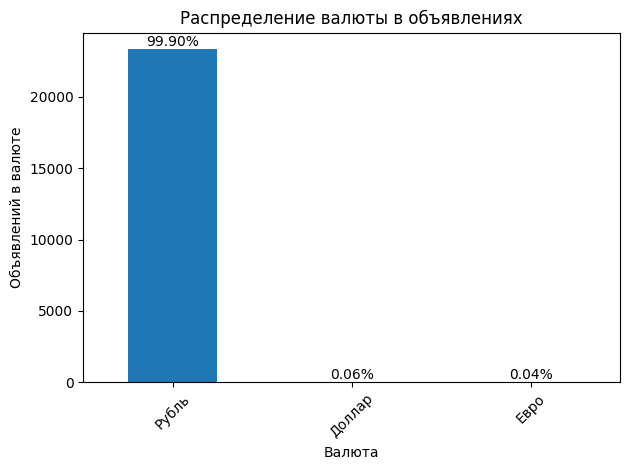

In [19]:
#делаем график из датафрейма
currency_counts.plot(kind='bar')
for i, count in enumerate(currency_counts.values):
    percent = 100 * count / total
    plt.text(i, count, f"{percent:.2f}%", ha='center', va='bottom')
plt.title('Распределение валюты в объявлениях')
plt.xlabel('Валюта')
plt.xticks(rotation=45)
plt.ylabel('Объявлений в валюте')
plt.tight_layout()
plt.savefig('./image/6.svg')
plt.show()